In [2]:
from keras.models import Sequential
from keras.layers import SimpleRNN, LSTM
from keras.layers import Dense
from keras.layers import Embedding, SpatialDropout1D

Using TensorFlow backend.


In [1]:
import pandas as pd
import numpy as np
data_input = pd.ExcelFile('data training vector.xlsx').parse(0)
X_data = data_input.X.to_numpy()
y_train = data_input.y.to_numpy()
X = []
for i in range(0,len(X_data)):
    X.append(np.fromstring(X_data[i],sep=' '))
X_train = np.asarray(X)
X_train.shape

(24748, 12)

In [3]:
import pandas as pd
import numpy as np
data_input = pd.ExcelFile('data testing vector.xlsx').parse(0)
X_data = data_input.X.to_numpy()
y_test = data_input.y.to_numpy()
X = []
for i in range(0,len(X_data)):
    X.append(np.fromstring(X_data[i],sep=' '))
X_test = np.asarray(X)
X_test.shape

(6188, 12)

In [4]:
model = Sequential([
    
Embedding(input_dim=X_train.shape[0], output_dim=10, input_length=X_train.shape[1]), # embedding

LSTM(128, return_sequences=True), # rnn

LSTM(128), # rnn

Dense(15,activation='softmax')  # dense
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 12, 10)            247480    
_________________________________________________________________
lstm (LSTM)                  (None, 12, 128)           71168     
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense (Dense)                (None, 15)                1935      
Total params: 452,167
Trainable params: 452,167
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train,epochs=50, batch_size=256, verbose=2)
scores = model.evaluate(X_test, y_test)

Epoch 1/50
97/97 - 26s - loss: 1.2041 - accuracy: 0.5659
Epoch 2/50
97/97 - 13s - loss: 0.9596 - accuracy: 0.6352
Epoch 3/50
97/97 - 13s - loss: 0.8283 - accuracy: 0.6847
Epoch 4/50
97/97 - 13s - loss: 0.7574 - accuracy: 0.7116
Epoch 5/50
97/97 - 13s - loss: 0.7000 - accuracy: 0.7296
Epoch 6/50
97/97 - 13s - loss: 0.6630 - accuracy: 0.7434
Epoch 7/50
97/97 - 14s - loss: 0.6240 - accuracy: 0.7578
Epoch 8/50
97/97 - 13s - loss: 0.5831 - accuracy: 0.7750
Epoch 9/50
97/97 - 13s - loss: 0.5360 - accuracy: 0.7970
Epoch 10/50
97/97 - 12s - loss: 0.4862 - accuracy: 0.8140
Epoch 11/50
97/97 - 13s - loss: 0.4513 - accuracy: 0.8288
Epoch 12/50
97/97 - 13s - loss: 0.4133 - accuracy: 0.8445
Epoch 13/50
97/97 - 13s - loss: 0.3949 - accuracy: 0.8505
Epoch 14/50
97/97 - 13s - loss: 0.3654 - accuracy: 0.8644
Epoch 15/50
97/97 - 13s - loss: 0.3583 - accuracy: 0.8665
Epoch 16/50
97/97 - 13s - loss: 0.3159 - accuracy: 0.8830
Epoch 17/50
97/97 - 13s - loss: 0.3078 - accuracy: 0.8876
Epoch 18/50
97/97 - 13s

In [6]:
print("Accuracy: %.2f%%" % (scores[1]*100))
# Menampilkan grafik accuracy dan validation accuracy

Accuracy: 95.26%


In [7]:
yhatS = []
for x in X_test:
    yhat = model.predict(np.expand_dims(x,0))
    yhatS.append(np.argsort(yhat[0])[-1])

In [8]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print(accuracy_score(y_test,yhatS))

0.95260663507109


In [9]:
precision_score(y_test,yhatS,average='macro')

c:\users\nuras\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.7461014171213848

In [10]:
recall_score(y_test,yhatS,average='macro')

0.7703093203093203

In [11]:
f1_score(y_test,yhatS,average='macro')

0.7569230907101034

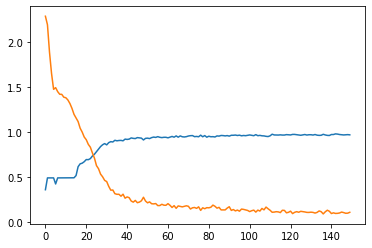

In [12]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])

# Tampilkan grafik yang telah diplot
plt.show()